In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

sys.path.append("../Lib")
from neuralnetwork import classifier
from imbalanced import balance_score,upsample,undersample

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Data

In [4]:
data_all=np.load('..\Data\data_ctcd_death_np.npy')

In [5]:
np.random.shuffle(data_all)
features_all=data_all[:,0:-1]
label_all=(data_all[:,-1]>0).astype(int)

In [6]:
label_all.shape

(7051,)

In [7]:
num_sample=data_all.shape[0]
num_sample

7051

In [8]:
num_feature=data_all.shape[1]-1
num_feature

23

In [9]:
num_train=int(num_sample*0.8)
num_train

5640

In [10]:
num_test=num_sample-num_train
num_test

1411

In [11]:
train_X=features_all[0:num_train,:]
train_y=label_all[0:num_train]
test_X=features_all[num_train:,:]
test_y=label_all[num_train:]

## NN

In [12]:
death_predicter=classifier(dim=num_feature)

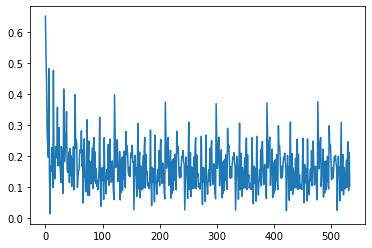

In [13]:
losses=death_predicter.train(train_X,train_y,lr=1e-2,iter=500)
plt.plot(losses)

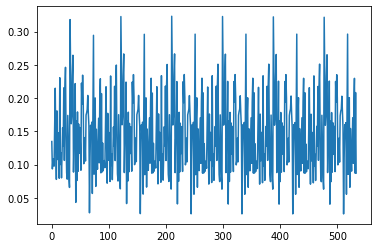

In [14]:
losses=death_predicter.train(train_X,train_y,lr=1e-4,iter=500)
plt.plot(losses)

In [15]:
result_test=death_predicter.predict(test_X)

In [16]:
balance_score(result_test,test_y)

0.5369414090262971

## LR

In [17]:
clf = LogisticRegression(random_state=0).fit(train_X, train_y)

In [18]:
result_test=clf.predict(test_X)

In [19]:
balance_score(result_test,test_y)

0.5294787224591329

## Oversampling

In [20]:
train_X1,train_y1=upsample(train_X,train_y)

### Oversampling + NN

In [21]:
death_predicter1=classifier(dim=num_feature)

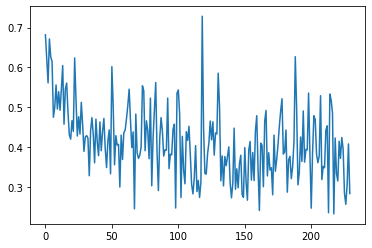

In [22]:
losses=death_predicter1.train(train_X1,train_y1,iter=200,lr=1e-2)
plt.plot(losses)

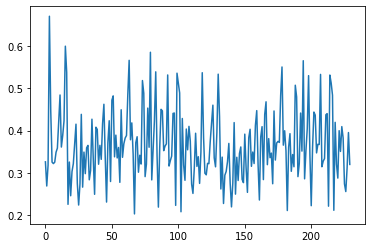

In [23]:
losses=death_predicter1.train(train_X1,train_y1,iter=200,lr=1e-4)
plt.plot(losses)

In [24]:
result_test=death_predicter1.predict(test_X)

In [25]:
balance_score(result_test,test_y)

0.759816986496091

### Oversampling + LR

In [26]:
clf = LogisticRegression(random_state=0)
clf.fit(train_X1, train_y1)

LogisticRegression(random_state=0)

In [27]:
result_test=clf.predict(test_X)

In [28]:
balance_score(result_test,test_y)

0.7183668710021323

## Undersampling

In [29]:
train_X1,train_y1=undersample(train_X,train_y)

### Undersampling + NN

In [30]:
death_predicter1=classifier(dim=num_feature)

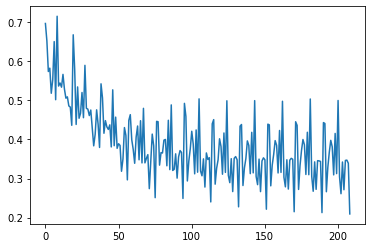

In [31]:
losses=death_predicter1.train(train_X1,train_y1,iter=200,lr=1e-2)
plt.plot(losses)

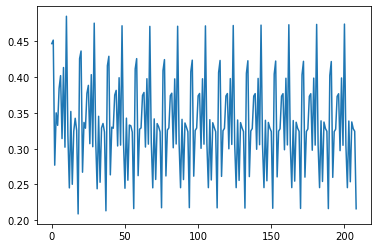

In [32]:
losses=death_predicter1.train(train_X1,train_y1,iter=200,lr=1e-4)
plt.plot(losses)

In [33]:
result_test=death_predicter1.predict(test_X)

In [34]:
balance_score(result_test,test_y)

0.7426594705046197

### Undersampling + LR

In [35]:
clf = LogisticRegression(random_state=0)
clf.fit(train_X1, train_y1)

LogisticRegression(random_state=0)

In [36]:
result_test=clf.predict(test_X)

In [37]:
balance_score(result_test,test_y)

0.7213430614783227

## Focal Loss

In [38]:
death_predicter2=classifier(dim=num_feature)

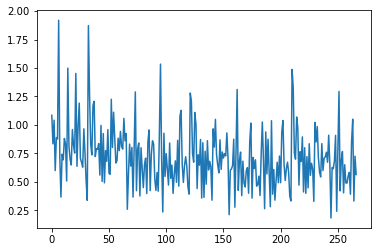

In [39]:
losses=death_predicter2.train(train_X,train_y,iter=200,lr=1e-2,loss=1)
plt.plot(losses)

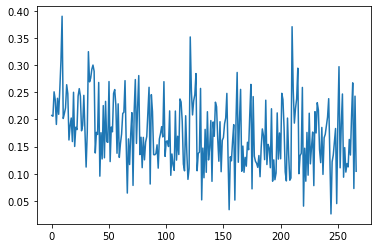

In [40]:
losses=death_predicter1.train(train_X,train_y,iter=200,lr=1e-4)
plt.plot(losses)

In [41]:
result_test=death_predicter2.predict(test_X)

In [42]:
balance_score(result_test,test_y)

0.7711109630419332